In [1]:
upper = pd.read_pickle('./data/Jemez_upper.pcl') 
raws = pd.read_pickle('./data/jemez_hourly_RH_TA_2002_2015.pcl')

In [2]:
el_up = 3020.60 # m
el_raws = 2514.0 # m

In [3]:
up = el_up - el_raws

In [4]:
def comp_dewpoint(df):
    T = df.AT
    RH = df.RH
    
    TD = 243.04*(np.log(RH/100)+((17.625*T)/(243.04+T)))/(17.625-np.log(RH/100)-((17.625*T)/(243.04+T)))
    
    return TD

In [5]:
upper['TD'] = upper.apply(comp_dewpoint,axis=1)

In [6]:
upper2 = upper.resample('H', how='mean') # resample to hourly data

In [7]:
upper2.head()

,BatteryVoltage,AT,RH,WindSpeed,WindDirection,WindSTD,NetRadiation,P,Rain_Duration,TD
2011-11-18 12:00:00,NaN,5.245810,26.072230,2.547509,21.786625,25.343910,233.650,0,0,-12.721199
2011-11-18 13:00:00,NaN,4.918071,36.088770,2.396297,29.611010,22.458105,136.400,0,0,-9.149778
2011-11-18 14:00:00,NaN,4.346401,38.964350,2.631139,44.622970,22.132130,80.030,0,0,-8.426230
2011-11-18 15:00:00,NaN,3.228099,40.641830,3.345421,53.102435,22.976840,-3.086,0,0,-8.894964
2011-11-18 16:00:00,NaN,2.603019,44.511815,3.045722,56.006745,16.066350,-34.990,0,0,-8.294197


In [8]:
raws['TD'] = raws.apply(comp_dewpoint,axis=1)

In [14]:
raws.tail()

,AT,RH,time,date,dt,TD
2014-09-30 19:00:00,11.069579,53.762598,19,2014-09-30,2014-09-30 19:00:00,2.046799
2014-09-30 20:00:00,9.387726,48.846689,20,2014-09-30,2014-09-30 20:00:00,-0.838451
2014-09-30 21:00:00,7.642335,43.706361,21,2014-09-30,2014-09-30 21:00:00,-3.939007
2014-09-30 22:00:00,5.952350,38.691919,22,2014-09-30,2014-09-30 22:00:00,-7.071692
2014-09-30 23:00:00,4.432941,34.145089,23,2014-09-30,2014-09-30 23:00:00,-10.032069


In [15]:
strt = '2012-01-01'
nd = '2013-12-31'

In [21]:
raws = raws[strt:nd]
upper2 = upper2[strt:nd]

In [22]:
TA_lapse = (upper2['AT']-raws['AT'])/up 
TD_lapse = (upper2['TD']-raws['TD'])/up

In [23]:
TA_lapse

2012-01-01 00:00:00    0.009251
2012-01-01 01:00:00    0.013184
2012-01-01 02:00:00    0.012468
2012-01-01 03:00:00    0.011581
2012-01-01 04:00:00    0.010782
2012-01-01 05:00:00    0.008310
2012-01-01 06:00:00    0.002250
2012-01-01 07:00:00    0.001430
2012-01-01 08:00:00   -0.002408
2012-01-01 09:00:00   -0.003406
2012-01-01 10:00:00   -0.002718
2012-01-01 11:00:00    0.000991
2012-01-01 12:00:00   -0.000244
2012-01-01 13:00:00   -0.004381
2012-01-01 14:00:00   -0.008243
2012-01-01 15:00:00   -0.009114
2012-01-01 16:00:00   -0.009723
2012-01-01 17:00:00   -0.010272
2012-01-01 18:00:00   -0.008288
2012-01-01 19:00:00   -0.005051
2012-01-01 20:00:00   -0.001093
2012-01-01 21:00:00    0.002122
2012-01-01 22:00:00    0.006481
2012-01-01 23:00:00    0.011364
2012-01-02 00:00:00    0.010733
2012-01-02 01:00:00    0.013143
2012-01-02 02:00:00    0.014871
2012-01-02 03:00:00    0.013034
2012-01-02 04:00:00    0.010730
2012-01-02 05:00:00    0.009512
                         ...   
2013-12-

In [24]:
def getDOY(index):
    return pd.datetime.strftime(index,'%j')

In [39]:
def getWeek(index):
    return int(pd.datetime.strftime(index,'%V'))

In [26]:
def getMonth(index):
    return pd.datetime.strftime(index,'%m')

In [27]:
lapse = pd.DataFrame({'AT':TA_lapse,'TD':TD_lapse})

In [40]:
lapse['week'] = lapse.index.map(getWeek)
lapse['doy'] = lapse.index.map(getDOY)
lapse['month'] = lapse.index.map(getMonth)

In [41]:
lapse2 = lapse.groupby(by='week').mean()

In [42]:
lapse2.head()

,AT,TD
week,,
1,-0.000270,0.000438
2,-0.000997,0.002054
3,-0.001874,0.002872
4,-0.001775,0.001674
5,-0.002905,0.001885


In [43]:
lapse2.to_pickle('./data/jemez_vcm_lapse_hourly_AT_TD.pcl')

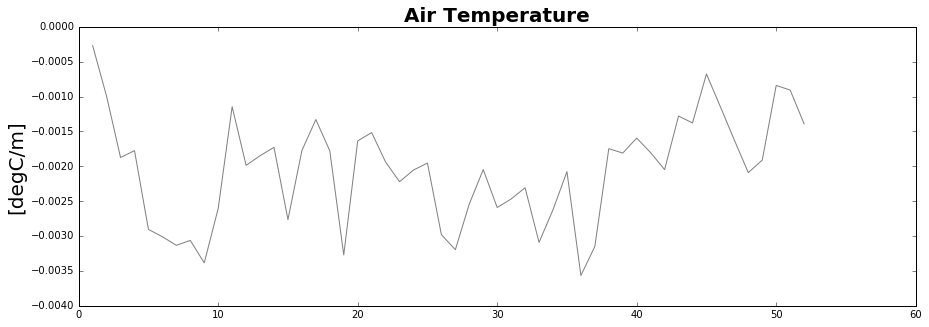

In [38]:
plt.figure(figsize=(15,5))
plt.plot(lapse2.index,lapse2.AT,'-k',c='0.5')
#plt.xlim(0,53)
plt.title('Air Temperature',fontsize=20, weight='bold')
plt.ylabel('[degC/m]', fontsize=20)
plt.axhline(0,c='k')

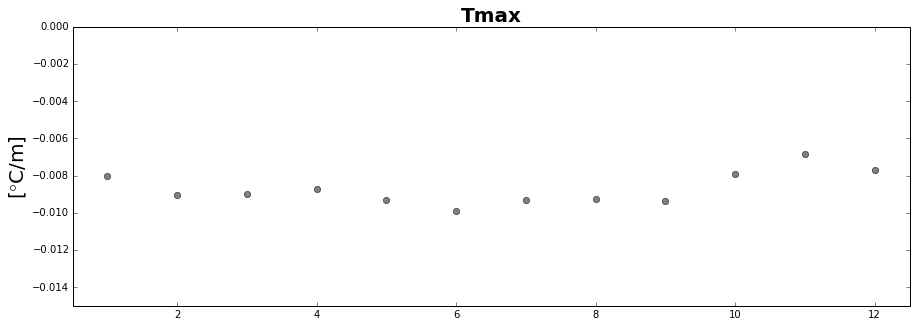

In [93]:
plt.figure(figsize=(15,5))
plt.plot(lapse2.index,lapse2.tmax,'o',c='0.5')
plt.xlim(0.5,12.5)
plt.ylim(-0.015,0)
plt.title('Tmax',fontsize=20, weight='bold')
plt.ylabel('[$\degree$C/m]', fontsize=20)
plt.axhline(0,c='k')

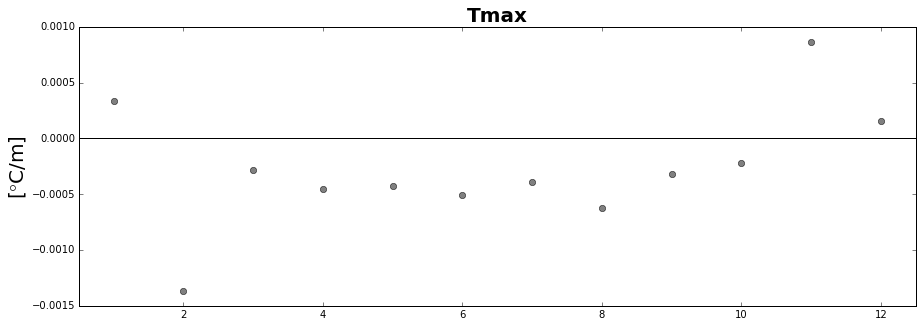

In [97]:
plt.figure(figsize=(15,5))
plt.plot(lapse2.index,lapse2.tmin,'o',c='0.5')
plt.xlim(0.5,12.5)
#plt.ylim(-0.002,0)
plt.title('Tmax',fontsize=20, weight='bold')
plt.ylabel('[$\degree$C/m]', fontsize=20)
plt.axhline(0,c='k')

In [99]:
lapse3 = lapse2.resample('D')

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex

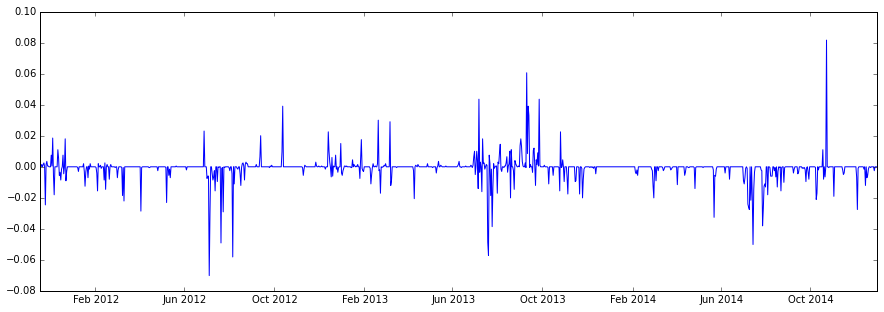

In [43]:
plt.figure(figsize=(15,5))
plt.plot(plapse.index,plapse)

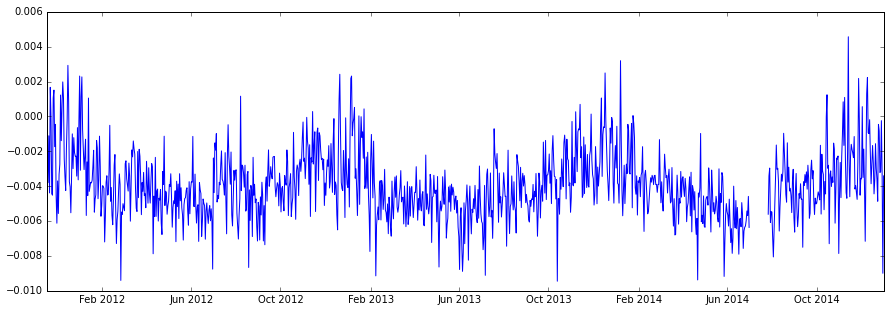

In [44]:
plt.figure(figsize=(15,5))
plt.plot(tave_lapse.index,tave_lapse)

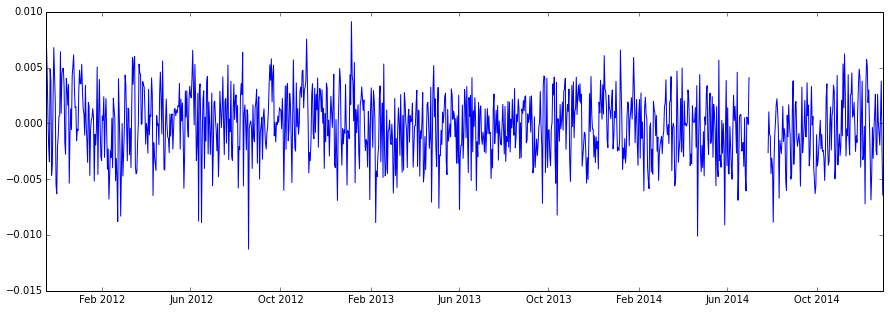

In [45]:
plt.figure(figsize=(15,5))
plt.plot(tmin_lapse.index,tmin_lapse)

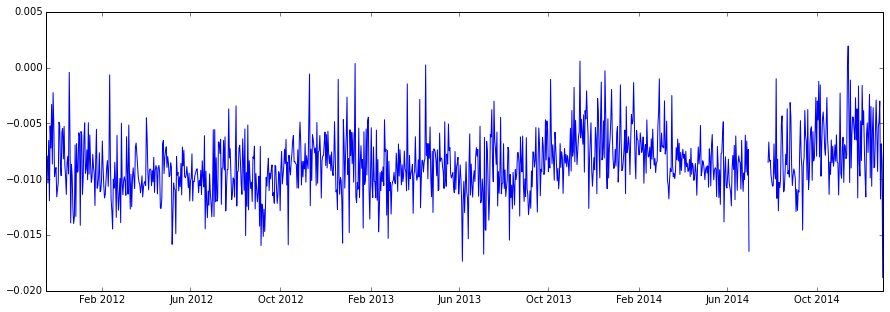

In [46]:
plt.figure(figsize=(15,5))
plt.plot(tmax_lapse.index,tmax_lapse)

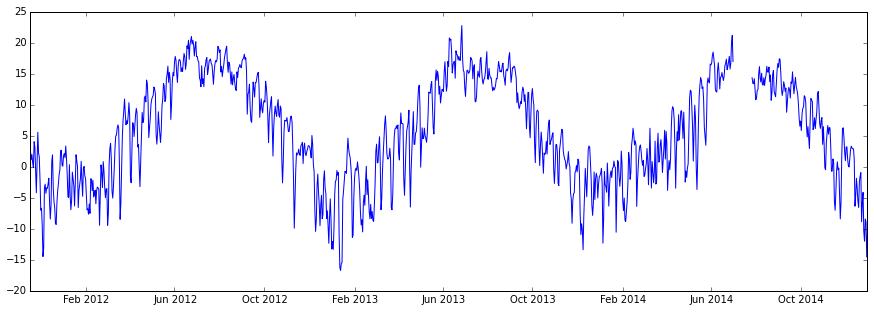

In [47]:
plt.figure(figsize=(15,5))
plt.plot(raws.index,upper.Tave)